<a href="https://colab.research.google.com/github/JPiamonte77/TELECOM-X-PROJECT/blob/main/TELECOM_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO TELECOM X**


###IMPORTACION DE DATOS

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df_raw = pd.read_json(url)
print(df_raw.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

### expancion de columnas anidadas


In [ ]:
df_flat = pd.concat([
    df_raw.drop(columns=['customer', 'phone', 'internet', 'account']),
    pd.json_normalize(df_raw['customer']),
    pd.json_normalize(df_raw['phone']),
    pd.json_normalize(df_raw['internet']),
    pd.json_normalize(df_raw['account'])
], axis=1)

###Columnas disponibles

In [ ]:
print("Columnas disponibles en df_flat:\n")
print(df_flat.columns.tolist())

Columnas disponibles en df_flat:

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


###Lista original

In [ ]:
column_order = [
    'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges', 'tenure',
    'Churn'
]


###Filtracion de columnas existentes

In [ ]:
column_order_valid = [col for col in column_order if col in df_flat.columns]

### Advertencia de columna faltante

In [ ]:
missing = set(column_order) - set(column_order_valid)
if missing:
    print(f"\n❗ Advertencia: Las siguientes columnas no se encontraron y serán omitidas:\n{missing}\n")


❗ Advertencia: Las siguientes columnas no se encontraron y serán omitidas:
{'MonthlyCharges', 'TotalCharges'}



###Reordenar y crear DataFrame

In [ ]:
df = df_flat[column_order_valid]

###Mostrar resultado

In [ ]:
print("\nPrimeras filas del DataFrame ordenado:\n")
print(df.head())


Primeras filas del DataFrame ordenado:

   customerID  gender  SeniorCitizen Partner Dependents PhoneService  \
0  0002-ORFBO  Female              0     Yes        Yes          Yes   
1  0003-MKNFE    Male              0      No         No          Yes   
2  0004-TLHLJ    Male              0      No         No          Yes   
3  0011-IGKFF    Male              1     Yes         No          Yes   
4  0013-EXCHZ  Female              1     Yes         No          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies    

### Nombres de columnas

In [ ]:
print(df.dtypes)

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
tenure               int64
Churn               object
dtype: object


### verificacion de la informacion en general

In [ ]:
print("\nResumen con df.info():")
df.info()


Resumen con df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   gender            7267 non-null   object
 2   SeniorCitizen     7267 non-null   int64 
 3   Partner           7267 non-null   object
 4   Dependents        7267 non-null   object
 5   PhoneService      7267 non-null   object
 6   MultipleLines     7267 non-null   object
 7   InternetService   7267 non-null   object
 8   OnlineSecurity    7267 non-null   object
 9   OnlineBackup      7267 non-null   object
 10  DeviceProtection  7267 non-null   object
 11  TechSupport       7267 non-null   object
 12  StreamingTV       7267 non-null   object
 13  StreamingMovies   7267 non-null   object
 14  Contract          7267 non-null   object
 15  PaperlessBilling  7267 non-null   object
 16  PaymentMethod     7267 non-null   ob

###Estadísticas descriptivas

In [ ]:
print("\nEstadísticas numéricas:")
print(df.describe())


Estadísticas numéricas:
       SeniorCitizen       tenure
count    7267.000000  7267.000000
mean        0.162653    32.346498
std         0.369074    24.571773
min         0.000000     0.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000


###Primeras filas

In [ ]:
print("\nPrimeras filas:")
print(df.head())


Primeras filas:
   customerID  gender  SeniorCitizen Partner Dependents PhoneService  \
0  0002-ORFBO  Female              0     Yes        Yes          Yes   
1  0003-MKNFE    Male              0      No         No          Yes   
2  0004-TLHLJ    Male              0      No         No          Yes   
3  0011-IGKFF    Male              1     Yes         No          Yes   
4  0013-EXCHZ  Female              1     Yes         No          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBi

###variables relevantes para el analisis

####*variables demograficas*

*   SeniorCitizen
*   Partner
*   Dependents
*   gender


####*variables de servicios*


*   PhoneService
*   MultipleLines
*   InternetService
*   OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
*   StreamingTV,StreamingMovies

####*variables contractuales y de facturacion*


*   Contract
*   PaperlessBilling
*   PaymentMethod
*   MonthlyCharges
*   TotalCharges
*   tenure

####*variable objetivo*

*   churn


## proporcion de clientes que se dieron de baja

In [ ]:
print(df['Churn'].value_counts(normalize=True))

Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


## Relación entre tenure y Churn:

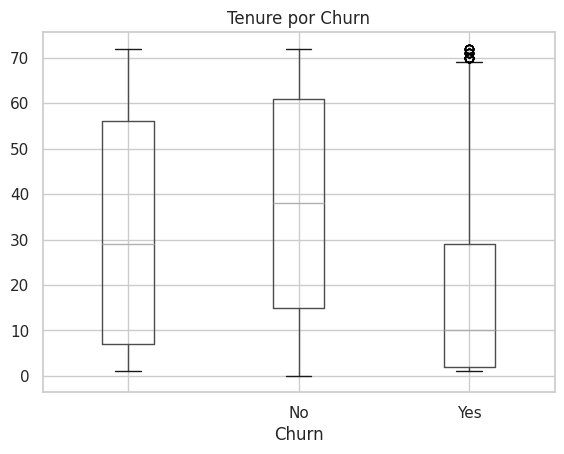

In [ ]:
import matplotlib.pyplot as plt

df.boxplot(column='tenure', by='Churn')
plt.title('Tenure por Churn')
plt.suptitle('')
plt.show()


##correlación entre cargos mensuales y Churn

In [ ]:
print([col for col in df.columns if 'charge' in col.lower() or 'payment' in col.lower() or 'contract' in col.lower()])

['Contract', 'PaymentMethod']


In [ ]:
import requests
import pprint

In [ ]:
data = requests.get(url).json()
pprint.pprint(data[0]['account'])

{'Charges': {'Monthly': 65.6, 'Total': '593.3'},
 'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check'}


In [ ]:
df_flat = pd.concat([
    df_raw.drop(columns=['customer', 'phone', 'internet', 'account']),
    pd.json_normalize(df_raw['customer']),
    pd.json_normalize(df_raw['phone']),
    pd.json_normalize(df_raw['internet']),
    pd.json_normalize(df_raw['account'], sep='_')
], axis=1)

In [ ]:
print("\nColumnas relacionadas con cargos:")
print([col for col in df_flat.columns if 'Charge' in col or 'charge' in col])


Columnas relacionadas con cargos:
['Charges_Monthly', 'Charges_Total']


In [ ]:
print(df_flat.columns.tolist())


['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total']


In [ ]:
print(df_flat[['Charges_Monthly', 'Charges_Total']].head())


   Charges_Monthly Charges_Total
0             65.6         593.3
1             59.9         542.4
2             73.9        280.85
3             98.0       1237.85
4             83.9         267.4


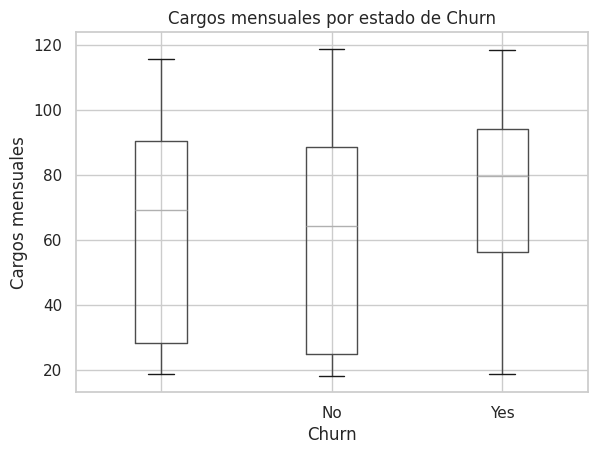

In [ ]:
import matplotlib.pyplot as plt

df_flat.boxplot(column='Charges_Monthly', by='Churn')
plt.title('Cargos mensuales por estado de Churn')
plt.suptitle('')  # Elimina el título automático
plt.xlabel('Churn')
plt.ylabel('Cargos mensuales')
plt.show()

In [ ]:
print(" Valores nulos por columna:")
print(df_flat.isnull().sum())


print("\n Número de filas duplicadas:")
print(df_flat.duplicated().sum())

print("\n Tipos de datos por columna:")
print(df_flat.dtypes)

cat_cols = ['Churn', 'Contract', 'PaymentMethod', 'InternetService', 'gender',
            'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']
print("\n Valores únicos por columna categórica:")
for col in cat_cols:
    if col in df_flat.columns:
        print(f"{col}: {df_flat[col].unique()}")


print("\n Valores no numéricos en 'Charges_Total':")
print(df_flat[~df_flat['Charges_Total'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['Charges_Total'])


df_flat['Charges_Total'] = pd.to_numeric(df_flat['Charges_Total'], errors='coerce')
df_flat['Charges_Monthly'] = pd.to_numeric(df_flat['Charges_Monthly'], errors='coerce')


 Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64

 Número de filas duplicadas:
0

 Tipos de datos por columna:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies

###Eliminar o imputar valores nulos en 'Charges_Total'

In [ ]:
df_clean = df_flat.dropna(subset=['Charges_Total'])

###Reemplazar cadena vacía en Churn con NaN y eliminar o imputar

In [ ]:
import numpy as np

df_clean['Churn'].replace('', np.nan, inplace=True)
df_clean = df_clean.dropna(subset=['Churn'])

/tmp/ipython-input-459021175.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Churn'].replace('', np.nan, inplace=True)
/tmp/ipython-input-459021175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Churn'].replace('', np.nan, inplace=True)


 ### Normalizar valores categóricos

In [ ]:
cols_phone = ['MultipleLines']
cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_phone:
    df_clean[col] = df_clean[col].replace('No phone service', 'No')


for col in cols_internet:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

### verificacion valores nulos despues de limpieza

In [ ]:
print("\n Valores nulos después de limpieza:")
print(df_clean.isnull().sum())


 Valores nulos después de limpieza:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64


In [ ]:
print("\n Valores únicos en 'Churn' después de limpieza:")
print(df_clean['Churn'].unique())


 Valores únicos en 'Churn' después de limpieza:
['No' 'Yes']


### columna 'Cuentas_Diarias' a partir de la facturación mensual

In [ ]:
df_clean['Cuentas_Diarias'] = df_clean['Charges_Monthly'] / 30

### primeras filas para verificar

In [ ]:
print(df_clean[['Charges_Monthly', 'Cuentas_Diarias']].head())

   Charges_Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


###Mapeo binario general

In [ ]:
bin_map = {'Yes': 1, 'No': 0}

###Columnas que aplican

In [ ]:
binary_columns = ['Churn', 'Partner', 'Dependents', 'PhoneService',
                  'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

###Aplicar transformación

In [ ]:
df_clean[binary_columns] = df_clean[binary_columns].replace(bin_map)

/tmp/ipython-input-3434938293.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[binary_columns] = df_clean[binary_columns].replace(bin_map)


###Renombrar columna

In [ ]:
df_clean.rename(columns={
    'Churn': 'Cancelación',
    'tenure': 'Meses_de_Antigüedad',
    'Charges_Monthly': 'Facturación_Mensual',
    'Charges_Total': 'Facturación_Total',
    'Cuentas_Diarias': 'Facturación_Diaria'
}, inplace=True)

 ### Convertir columnas categóricas a formato categórico o numérico

In [ ]:
df_clean['gender'] = df_clean['gender'].map({'Male': 1, 'Female': 0})


In [ ]:
print(df_clean.columns.tolist())

['customerID', 'Cancelación', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Meses_de_Antigüedad', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Facturación_Mensual', 'Facturación_Total', 'Facturación_Diaria']


In [ ]:
# Estadísticas descriptivas generales
print("\n Estadísticas generales de variables numéricas:")
print(df_clean[['Facturación_Mensual', 'Facturación_Total', 'Meses_de_Antigüedad', 'Facturación_Diaria']].describe())



 Estadísticas generales de variables numéricas:
       Facturación_Mensual  Facturación_Total  Meses_de_Antigüedad  \
count          7032.000000        7032.000000          7032.000000   
mean             64.798208        2283.300441            32.421786   
std              30.085974        2266.771362            24.545260   
min              18.250000          18.800000             1.000000   
25%              35.587500         401.450000             9.000000   
50%              70.350000        1397.475000            29.000000   
75%              89.862500        3794.737500            55.000000   
max             118.750000        8684.800000            72.000000   

       Facturación_Diaria  
count         7032.000000  
mean             2.159940  
std              1.002866  
min              0.608333  
25%              1.186250  
50%              2.345000  
75%              2.995417  
max              3.958333  


In [ ]:
# Mediana
print("\n Mediana:")
print(df_clean[['Facturación_Mensual', 'Facturación_Total', 'Meses_de_Antigüedad']].median())

# Desviación estándar
print("\n Desviación estándar:")
print(df_clean[['Facturación_Mensual', 'Facturación_Total', 'Meses_de_Antigüedad']].std())



 Mediana:
Facturación_Mensual      70.350
Facturación_Total      1397.475
Meses_de_Antigüedad      29.000
dtype: float64

 Desviación estándar:
Facturación_Mensual      30.085974
Facturación_Total      2266.771362
Meses_de_Antigüedad      24.545260
dtype: float64


In [ ]:
from scipy.stats import skew, kurtosis

cols = ['Facturación_Mensual', 'Facturación_Total', 'Meses_de_Antigüedad']

print("\n Asimetría (skew):")
for col in cols:
    print(f"{col}: {skew(df_clean[col].dropna()):.2f}")

print("\n Curtosis:")
for col in cols:
    print(f"{col}: {kurtosis(df_clean[col].dropna()):.2f}")



 Asimetría (skew):
Facturación_Mensual: -0.22
Facturación_Total: 0.96
Meses_de_Antigüedad: 0.24

 Curtosis:
Facturación_Mensual: -1.26
Facturación_Total: -0.23
Meses_de_Antigüedad: -1.39


In [ ]:
cat_cols = ['Cancelación', 'gender', 'Partner', 'Dependents', 'PhoneService',
            'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

print("\n Distribución de variables categóricas:")
for col in cat_cols:
    if col in df_clean.columns:
        print(f"\n{col}:\n{df_clean[col].value_counts(normalize=True).round(3)}")



 Distribución de variables categóricas:

Cancelación:
Cancelación
0    0.734
1    0.266
Name: proportion, dtype: float64

gender:
gender
1    0.505
0    0.495
Name: proportion, dtype: float64

Partner:
Partner
0    0.517
1    0.483
Name: proportion, dtype: float64

Dependents:
Dependents
0    0.702
1    0.298
Name: proportion, dtype: float64

PhoneService:
PhoneService
1    0.903
0    0.097
Name: proportion, dtype: float64

PaperlessBilling:
PaperlessBilling
1    0.593
0    0.407
Name: proportion, dtype: float64

OnlineSecurity:
OnlineSecurity
0    0.713
1    0.287
Name: proportion, dtype: float64

OnlineBackup:
OnlineBackup
0    0.655
1    0.345
Name: proportion, dtype: float64

DeviceProtection:
DeviceProtection
0    0.656
1    0.344
Name: proportion, dtype: float64

TechSupport:
TechSupport
0    0.71
1    0.29
Name: proportion, dtype: float64

StreamingTV:
StreamingTV
0    0.616
1    0.384
Name: proportion, dtype: float64

StreamingMovies:
StreamingMovies
0    0.612
1    0.388
Name

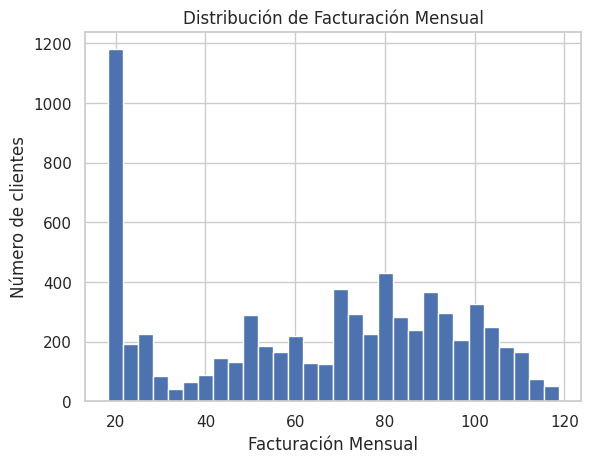

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_clean['Facturación_Mensual'], bins=30)
plt.title('Distribución de Facturación Mensual')
plt.xlabel('Facturación Mensual')
plt.ylabel('Número de clientes')
plt.grid(True)
plt.show()


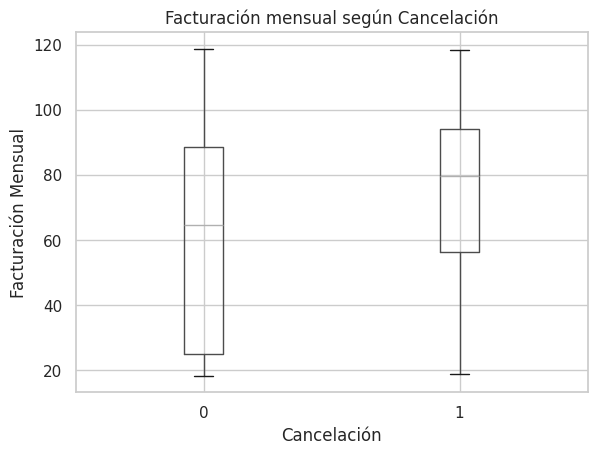

In [ ]:
df_clean.boxplot(column='Facturación_Mensual', by='Cancelación')
plt.title('Facturación mensual según Cancelación')
plt.suptitle('')
plt.xlabel('Cancelación')
plt.ylabel('Facturación Mensual')
plt.show()


####La proporción de clientes que se dieron de baja.

####La proporción de clientes que permanecieron.



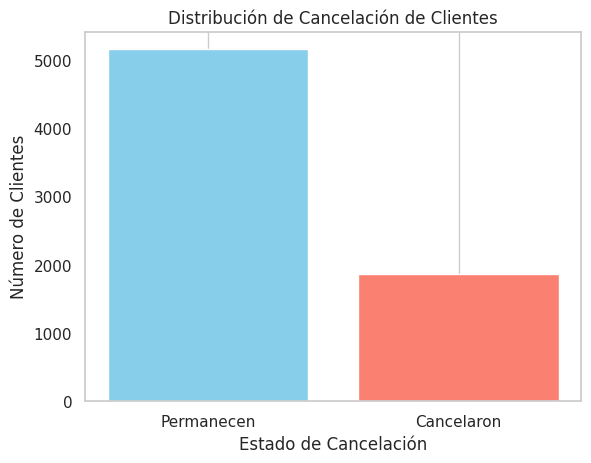

In [ ]:
import matplotlib.pyplot as plt

# Conteo de valores
churn_counts = df_clean['Cancelación'].value_counts()
labels = ['Permanecen', 'Cancelaron']
colors = ['skyblue', 'salmon']

# Gráfico de barras
plt.bar(labels, churn_counts, color=colors)
plt.title('Distribución de Cancelación de Clientes')
plt.ylabel('Número de Clientes')
plt.xlabel('Estado de Cancelación')
plt.grid(axis='y')
plt.show()


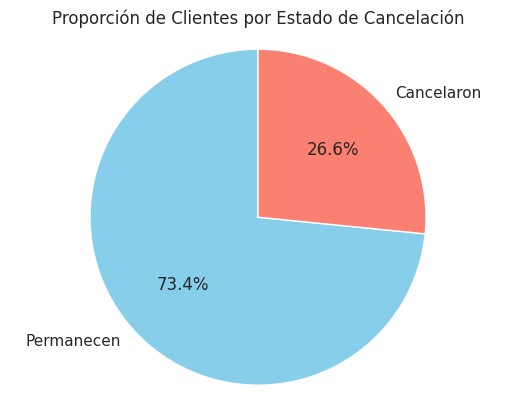

In [ ]:
# Gráfico de pastel
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proporción de Clientes por Estado de Cancelación')
plt.axis('equal')  # Círculo perfecto
plt.show()


In [ ]:
print("\n Proporción de cancelaciones:")
print(df_clean['Cancelación'].value_counts(normalize=True).round(3))



 Proporción de cancelaciones:
Cancelación
0    0.734
1    0.266
Name: proportion, dtype: float64


####grafico de cancelacion por genero

/tmp/ipython-input-1497575531.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancelacion_por_genero.index, y=cancelacion_por_genero.values, palette='pastel')


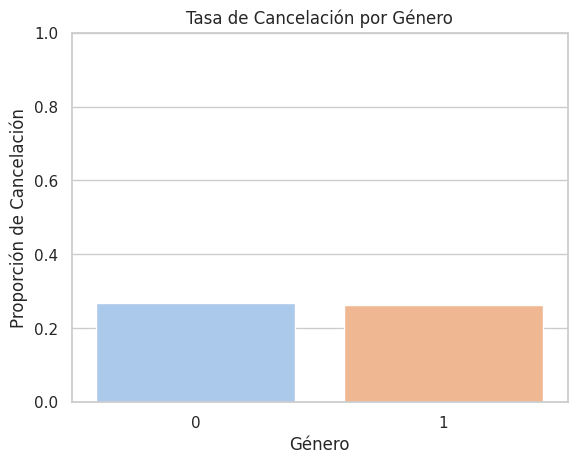

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de cancelación por género
cancelacion_por_genero = df_clean.groupby('gender')['Cancelación'].mean()

sns.barplot(x=cancelacion_por_genero.index, y=cancelacion_por_genero.values, palette='pastel')
plt.title('Tasa de Cancelación por Género')
plt.ylabel('Proporción de Cancelación')
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()



/tmp/ipython-input-3468420529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa.index, y=tasa.values, palette='Set2')


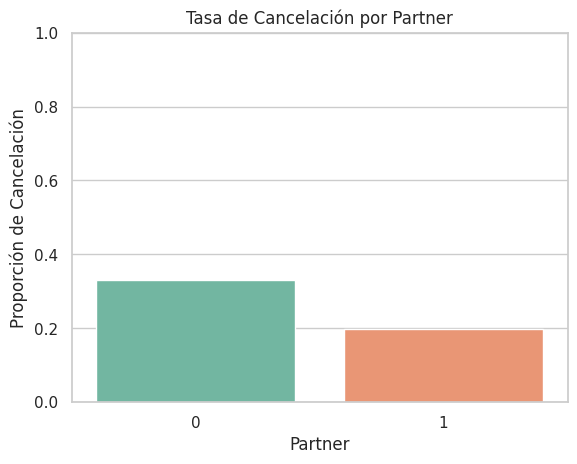

/tmp/ipython-input-3468420529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa.index, y=tasa.values, palette='Set2')


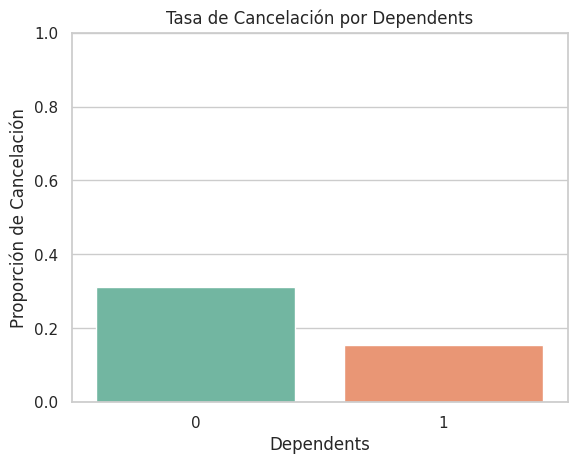

/tmp/ipython-input-3468420529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa.index, y=tasa.values, palette='Set2')


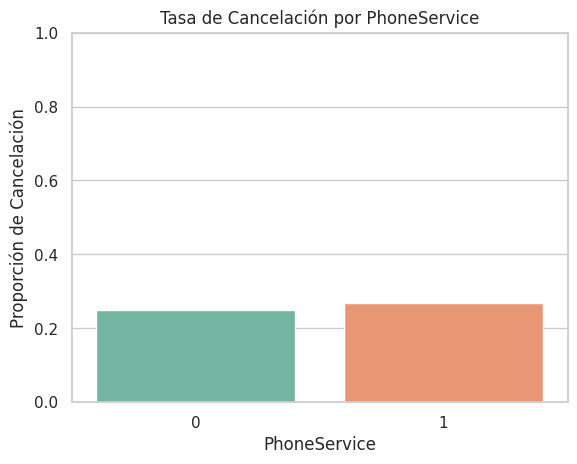

/tmp/ipython-input-3468420529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa.index, y=tasa.values, palette='Set2')


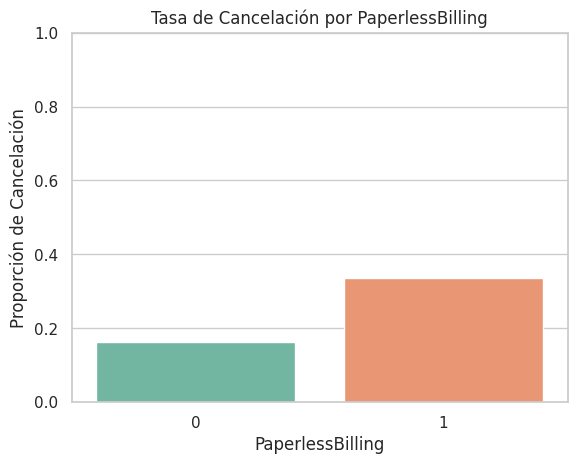

/tmp/ipython-input-3468420529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa.index, y=tasa.values, palette='Set2')


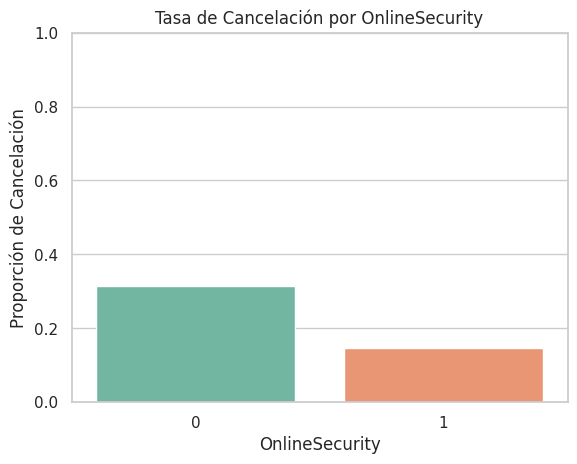

/tmp/ipython-input-3468420529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa.index, y=tasa.values, palette='Set2')


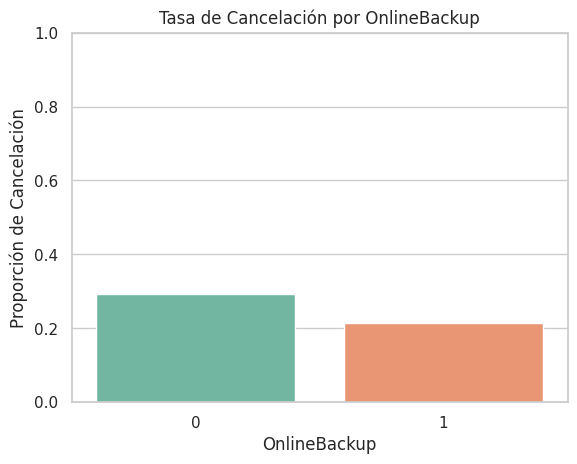

/tmp/ipython-input-3468420529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa.index, y=tasa.values, palette='Set2')


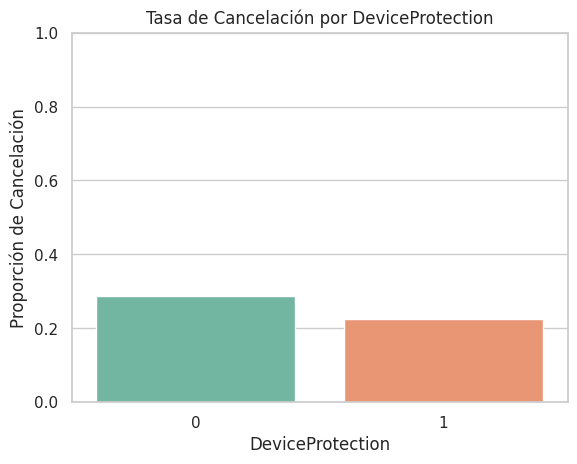

/tmp/ipython-input-3468420529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa.index, y=tasa.values, palette='Set2')


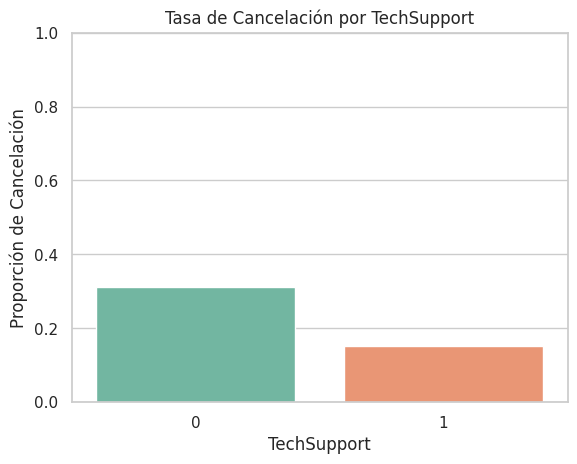

/tmp/ipython-input-3468420529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa.index, y=tasa.values, palette='Set2')


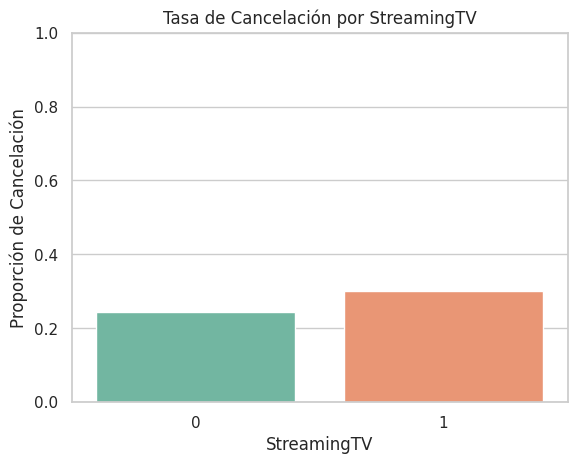

/tmp/ipython-input-3468420529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa.index, y=tasa.values, palette='Set2')


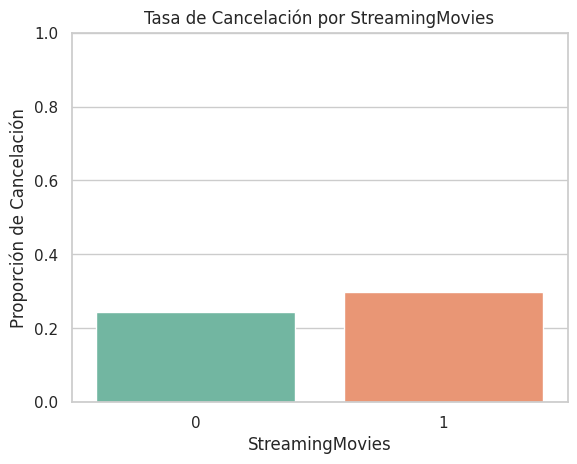

In [ ]:
cat_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cat_binarias:
    if col in df_clean.columns:
        tasa = df_clean.groupby(col)['Cancelación'].mean()
        sns.barplot(x=tasa.index, y=tasa.values, palette='Set2')
        plt.title(f'Tasa de Cancelación por {col}')
        plt.ylabel('Proporción de Cancelación')
        plt.xlabel(col)
        plt.ylim(0, 1)
        plt.show()


####tasa de cancelacion por tipo de contrato


In [ ]:
print(df_clean.columns.tolist())


['customerID', 'Cancelación', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Meses_de_Antigüedad', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Facturación_Mensual', 'Facturación_Total', 'Facturación_Diaria']


In [ ]:
# Verificar si las columnas dummy existen antes de aplicar la función
required_columns = ['Contract_One year', 'Contract_Two year']
if all(col in df_clean.columns for col in required_columns):

    # Función para convertir las columnas dummy a una etiqueta legible
    def obtener_tipo_contrato(row):
        if row['Contract_One year'] == 1:
            return 'One year'
        elif row['Contract_Two year'] == 1:
            return 'Two year'
        else:
            return 'Month-to-month'

    # Aplicar la función al DataFrame
    df_clean['Tipo_Contrato'] = df_clean.apply(obtener_tipo_contrato, axis=1)

    # Mostrar ejemplo de los primeros registros
    print(df_clean[['Contract_One year', 'Contract_Two year', 'Tipo_Contrato']].head())

else:
    print(" Las columnas dummy del contrato no se encuentran en el DataFrame.")


 Las columnas dummy del contrato no se encuentran en el DataFrame.


In [ ]:
df_clean['Tipo_Contrato'] = df_clean['Contract']


In [ ]:
print(df_clean.columns)


Index(['customerID', 'Cancelación', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Meses_de_Antigüedad', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Facturación_Mensual',
       'Facturación_Total', 'Facturación_Diaria', 'Tipo_Contrato'],
      dtype='object')


In [ ]:
for col in df_clean.columns:
    print(col)





customerID
Cancelación
gender
SeniorCitizen
Partner
Dependents
Meses_de_Antigüedad
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Facturación_Mensual
Facturación_Total
Facturación_Diaria
Tipo_Contrato


In [ ]:
# Convertir la columna 'Contract' en variables dummy
df_clean = pd.get_dummies(df_clean, columns=['Contract'], prefix='Contract')


In [ ]:
def obtener_tipo_contrato(row):
    if row['Contract_One year'] == 1:
        return 'One year'
    elif row['Contract_Two year'] == 1:
        return 'Two year'
    else:
        return 'Month-to-month'

df_clean['Tipo_Contrato'] = df_clean.apply(obtener_tipo_contrato, axis=1)


In [ ]:
# Crear una columna legible con los nombres reales del tipo de contrato
def obtener_tipo_contrato(row):
    if row['Contract_One year'] == 1:
        return 'One year'
    elif row['Contract_Two year'] == 1:
        return 'Two year'
    else:
        return 'Month-to-month'

df_clean['Tipo_Contrato'] = df_clean.apply(obtener_tipo_contrato, axis=1)



/tmp/ipython-input-2903457288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='Tipo_Contrato', y='Cancelación', palette='pastel')


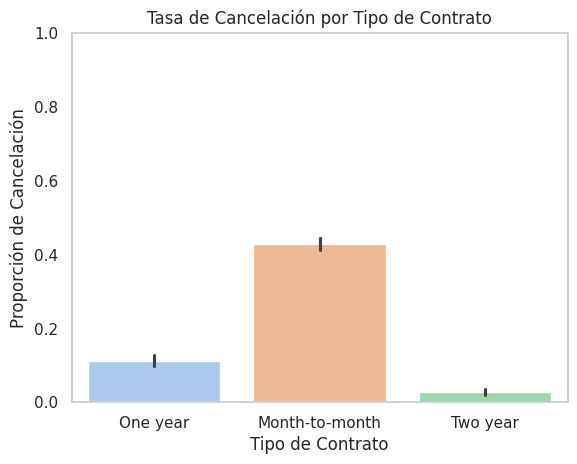

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_clean, x='Tipo_Contrato', y='Cancelación', palette='pastel')
plt.title('Tasa de Cancelación por Tipo de Contrato')
plt.ylabel('Proporción de Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


####distribucion de variables entre los clientes que cancelaron


/tmp/ipython-input-3446053818.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Cancelación', y=variable, palette='pastel')


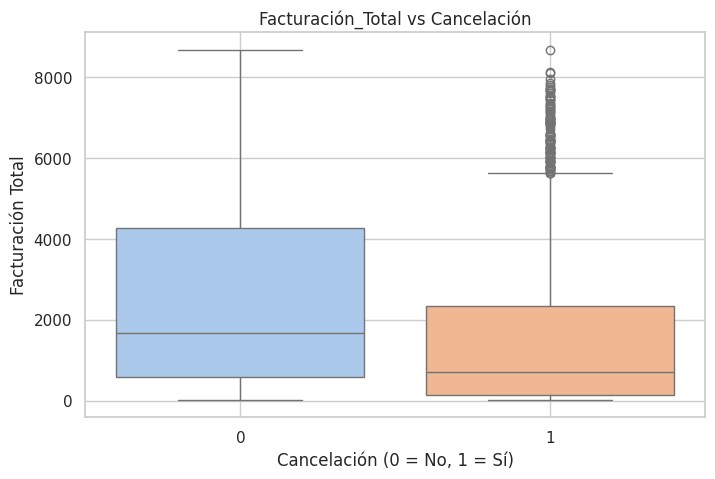

/tmp/ipython-input-3446053818.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Cancelación', y=variable, palette='pastel')


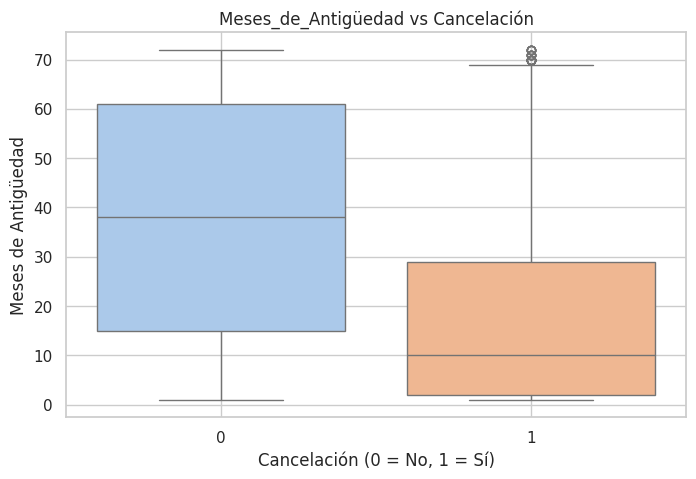

/tmp/ipython-input-3446053818.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Cancelación', y=variable, palette='pastel')


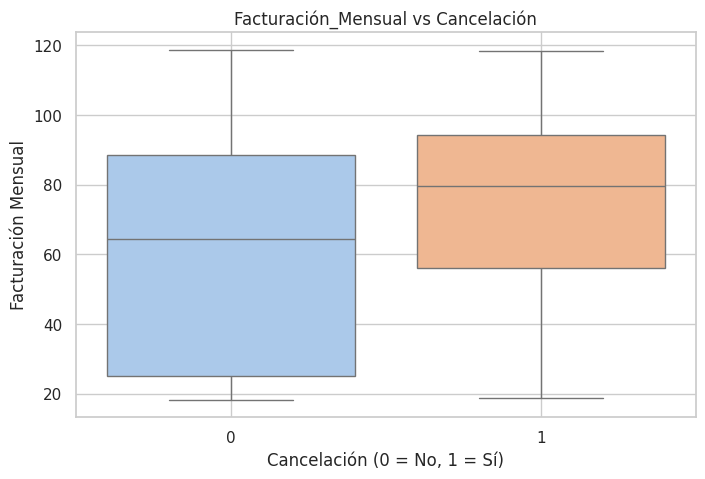

/tmp/ipython-input-3446053818.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Cancelación', y=variable, palette='pastel')


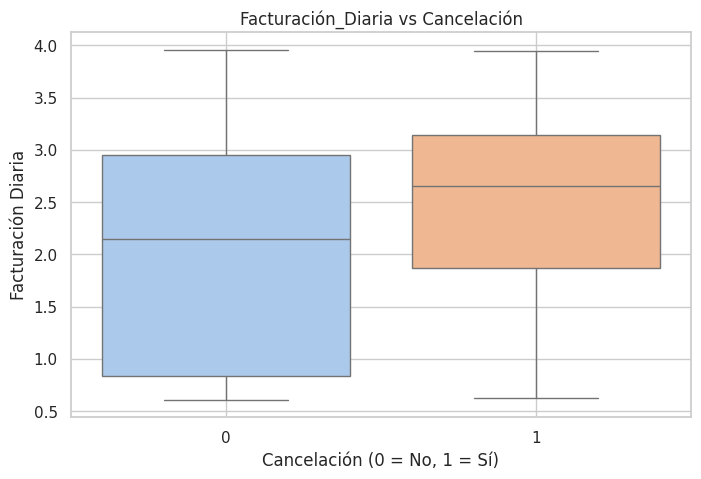

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilo
sns.set(style="whitegrid")

# Lista de variables numéricas a analizar
variables_numericas = ['Facturación_Total', 'Meses_de_Antigüedad', 'Facturación_Mensual', 'Facturación_Diaria']

# Graficar cada variable numérica según evasión
for variable in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_clean, x='Cancelación', y=variable, palette='pastel')
    plt.title(f'{variable} vs Cancelación')
    plt.xlabel('Cancelación (0 = No, 1 = Sí)')
    plt.ylabel(variable.replace('_', ' '))
    plt.grid(True)
    plt.show()


#**INFORME FINAL – ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)**
La retención de clientes es un desafío crítico para cualquier empresa de servicios. El fenómeno de evasión de clientes (conocido como churn) ocurre cuando un cliente decide cancelar o abandonar el servicio. Este análisis tiene como objetivo:

Identificar patrones comunes entre los clientes que se dieron de baja.

Comprender los factores que más influyen en la evasión.

Proponer estrategias basadas en los datos que ayuden a reducir el churn.

Para lograr un análisis preciso, se siguieron los siguientes pasos de preparación de datos:

Importación del dataset en formato JSON.

Revisión de valores nulos y duplicados, eliminando registros incompletos.

Conversión de tipos de datos (ej. montos facturados a valores numéricos).

##Creación de nuevas variables:

Facturación_Diaria: calculada como Facturación_Mensual / 30.

Meses_de_Antigüedad: ya incluida y clave para el análisis.

Normalización de variables categóricas mediante One-Hot Encoding.

##Distribución de Evasión
Se analizó la variable Cancelación (0 = No canceló, 1 = Canceló), visualizando la proporción de clientes:



/tmp/ipython-input-3168670078.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancelación', data=df_clean, palette='Set2')


<Axes: xlabel='Cancelación', ylabel='count'>

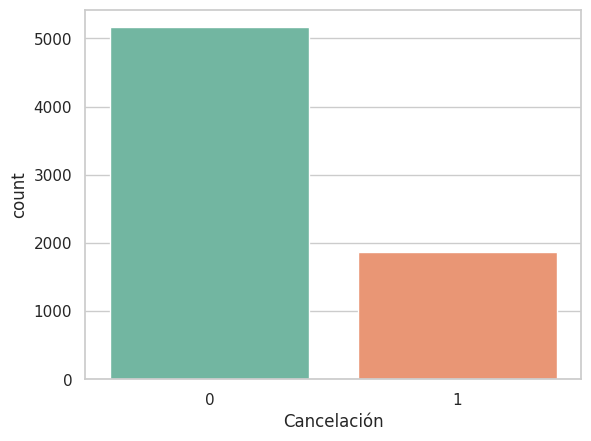

In [ ]:
sns.countplot(x='Cancelación', data=df_clean, palette='Set2')


##Análisis Exploratorio de Datos (EDA)

Análisis Descriptivo:
Se calcularon estadísticas como media, mediana y desviación estándar para las variables numéricas como:

Facturación_Mensual

Facturación_Total

Meses_de_Antigüedad

Esto permitió detectar que los clientes con menor antigüedad y mayor facturación tienden a cancelar con mayor frecuencia.

###Distribución de la variable Cancelación:
Se visualizó mediante un gráfico de barras la proporción de clientes que cancelaron (1) y los que permanecieron (0).

Aproximadamente 26% de los clientes cancelaron el servicio, mientras que 74% lo mantuvieron.

###Relación entre Cancelación y variables categóricas:
Se exploraron variables como gender, SeniorCitizen, Contract, PaymentMethod, InternetService.

**Se detectó mayor churn en:**


*   Clientes con contrato mensual.
*   Clientes que pagan con Electronic check.
*   Usuarios con servicio de fibra óptica y sin servicios adicionales como soporte técnico o respaldo en línea.

 Análisis por variables numéricas:
Se generaron gráficos (boxplots, histogramas) para comparar variables como Facturación_Total y Meses_de_Antigüedad entre quienes cancelaron y quienes no.

**Los clientes que cancelan suelen tener:**

*   Facturación total más baja (menos tiempo como clientes).
*   Menor antigüedad, lo que sugiere que muchos se van en los primeros meses.

###**Conclusiones e Insights**
La mayor tasa de cancelación se encuentra en clientes nuevos, especialmente aquellos con contratos mensuales.El método de pago Electronic check está altamente asociado con la cancelación.

Clientes sin servicios adicionales como OnlineBackup, TechSupport o DeviceProtection tienen mayor probabilidad de irse.La facturación total y la antigüedad del cliente parecen ser indicadores importantes del riesgo de churn





####***Recomendaciones***

*   Fidelización temprana: Enfocar esfuerzos en los primeros meses del cliente con promociones, soporte o beneficios.
*   Incentivar contratos anuales: Ofrecer descuentos por cambiar de contrato mensual a uno anual.
*   Optimizar medios de pago: Promover el uso de métodos automáticos como tarjeta de crédito.
*   Paquetes de valor agregado: Ofrecer servicios complementarios (como soporte técnico) con beneficios para reducir cancelaciones.
*   Modelo predictivo futuro: Utilizar este análisis como base para entrenar un modelo de machine learning que anticipe la evasión.




